In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.10.1


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_directory = r'D:\Machine Learning Projects\Chest X-Ray Images\chest_xray\train'

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=(256, 256),
    batch_size=32,  
    class_mode='categorical'
    )

Found 5216 images belonging to 2 classes.


In [4]:
val_directory = r'D:\Machine Learning Projects\Chest X-Ray Images\chest_xray\val'

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_directory,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)


Found 16 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define input shape based on image size and number of channels
input_shape = (256, 256, 3)

# Create a Sequential model and add layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compile the model with an optimizer, loss function, and metric(s)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create an early stopper
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.optimizers import Adam,SGD
checkpoint = ModelCheckpoint(
    './base.model',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False,
    period=1
)
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode='auto'
)

## Train the model using the fit_generator method and the previously created data generators
"""
model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=50,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)
"""

history = model.fit_generator(
    train_generator,
    steps_per_epoch=len(train_generator),epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator), 
    callbacks=[checkpoint,earlystop])

C:\Users\Nicky\AppData\Local\Temp\ipykernel_29180\1919471746.py:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
163/163 [==============================] - ETA: 0s - loss: 0.3757 - accuracy: 0.8819
Epoch 1: val_loss improved from inf to 0.41644, saving model to .\base.model


INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


163/163 [==============================] - 60s 328ms/step - loss: 0.3757 - accuracy: 0.8819 - val_loss: 0.4164 - val_accuracy: 0.8125
Epoch 2/25
163/163 [==============================] - ETA: 0s - loss: 0.1193 - accuracy: 0.9525
Epoch 2: val_loss improved from 0.41644 to 0.26568, saving model to .\base.model


INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


163/163 [==============================] - 35s 213ms/step - loss: 0.1193 - accuracy: 0.9525 - val_loss: 0.2657 - val_accuracy: 0.8125
Epoch 3/25
163/163 [==============================] - ETA: 0s - loss: 0.0735 - accuracy: 0.9747
Epoch 3: val_loss improved from 0.26568 to 0.14928, saving model to .\base.model


INFO:tensorflow:Assets written to: .\base.model\assets


INFO:tensorflow:Assets written to: .\base.model\assets


163/163 [==============================] - 35s 217ms/step - loss: 0.0735 - accuracy: 0.9747 - val_loss: 0.1493 - val_accuracy: 0.9375
Epoch 4/25
163/163 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9804
Epoch 4: val_loss did not improve from 0.14928
163/163 [==============================] - 34s 206ms/step - loss: 0.0571 - accuracy: 0.9804 - val_loss: 0.2702 - val_accuracy: 0.8750
Epoch 5/25
163/163 [==============================] - ETA: 0s - loss: 0.0465 - accuracy: 0.9808
Epoch 5: val_loss did not improve from 0.14928
163/163 [==============================] - 33s 205ms/step - loss: 0.0465 - accuracy: 0.9808 - val_loss: 0.3720 - val_accuracy: 0.8750
Epoch 6/25
163/163 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9908
Epoch 6: val_loss did not improve from 0.14928
163/163 [==============================] - 34s 206ms/step - loss: 0.0253 - accuracy: 0.9908 - val_loss: 0.5081 - val_accuracy: 0.8750
Epoch 7/25
163/163 [===============

In [6]:
test_generator = val_datagen.flow_from_directory(
    r'D:\Machine Learning Projects\Chest X-Ray Images\chest_xray\test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(test_generator))

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Found 624 images belonging to 2 classes.


C:\Users\Nicky\AppData\Local\Temp\ipykernel_29180\113677940.py:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(test_generator))


Test loss: 2.5433108806610107
Test accuracy: 0.7339743375778198


C:\Users\Nicky\AppData\Local\Temp\ipykernel_29180\4277038789.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator))


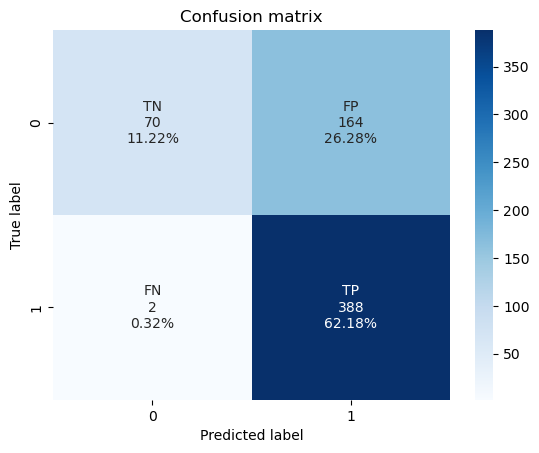

In [7]:
predictions = model.predict_generator(test_generator, steps=len(test_generator))
prediction_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_generator.classes, prediction_labels)

group_names = ['TN', 'FP', 'FN', 'TP']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [8]:
model.save('model_init')

INFO:tensorflow:Assets written to: model_init\assets


INFO:tensorflow:Assets written to: model_init\assets
